In [54]:
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from lifetimes.utils import summary_data_from_transaction_data
from jcopml.plot import plot_missing_value
from sklearn.tree import DecisionTreeClassifier #to build classification tree
from sklearn.tree import plot_tree #to draw c.tree
from sklearn.model_selection import train_test_split #to split data train and test
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [68]:
col_names = ["Gender","Age","SmokingHabit","MedConsumption","LeftHanded","BMI","Occupation","DiabeticRisk"]
df = pd.read_excel(r"C:\Users\SHELY MULIAWATI\Documents\DATAFINAL.xlsx", names = col_names)

In [69]:
df.head()

,Gender,Age,SmokingHabit,MedConsumption,LeftHanded,BMI,Occupation,DiabeticRisk
0,Male,69,Yes,No,No,27.01,Not Working,No Risk
1,Female,70,No,Yes,No,24.78,Housewife,No Risk
2,Female,75,No,No,No,20.63,Housewife,No Risk
3,Female,59,No,No,No,26.30,Housewife,No Risk
4,Female,60,No,Yes,No,27.78,Housewife,No Risk


In [70]:
df.describe()

,Age,BMI
count,170.000000,170.000000
mean,57.488235,25.378647
std,13.282652,4.691211
min,21.000000,16.300000
25%,50.250000,22.002500
50%,59.000000,25.060000
75%,66.750000,28.237500
max,87.000000,41.880000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          170 non-null    object 
 1   Age             170 non-null    int64  
 2   SmokingHabit    170 non-null    object 
 3   MedConsumption  170 non-null    object 
 4   LeftHanded      170 non-null    object 
 5   BMI             170 non-null    float64
 6   Occupation      170 non-null    object 
 7   DiabeticRisk    170 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 10.8+ KB


In [72]:
df.isnull().sum()

Gender            0
Age               0
SmokingHabit      0
MedConsumption    0
LeftHanded        0
BMI               0
Occupation        0
DiabeticRisk      0
dtype: int64

In [73]:
df.duplicated().sum()

0

In [23]:
df['Age'].skew()

-0.7208628346544925

In [24]:
df['BMI'].skew()

0.4716002433206764

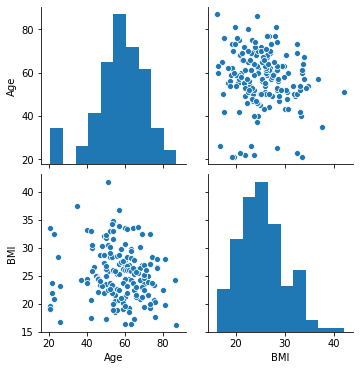

In [74]:
sns.pairplot(df)

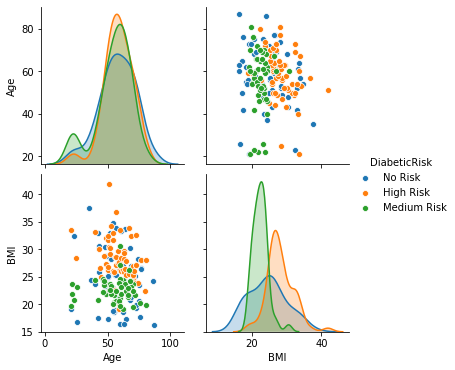

In [75]:
sns.pairplot(df, hue="DiabeticRisk")

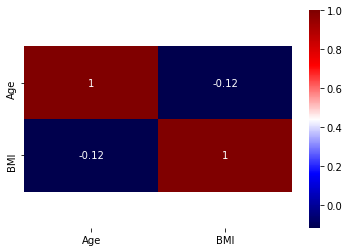

In [76]:
cor = df.corr()
plt.figure
ax = sns.heatmap(cor,annot=True,cmap="seismic")
bot,top=ax.get_ylim()
ax.set_ylim(bot+0.5,top-0.5)
plt.show()

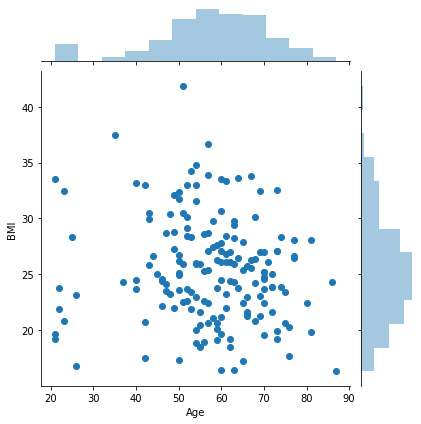

In [77]:
sns.jointplot(x="Age", y="BMI", data=df);

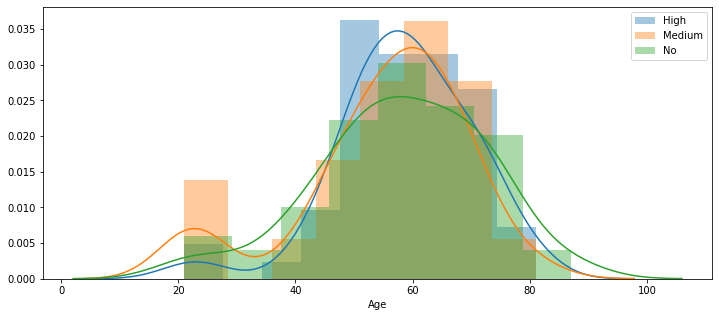

In [78]:
plt.figure(figsize=(12,5))
sns.distplot(df['Age'][df.DiabeticRisk=='High Risk'])
sns.distplot(df['Age'][df.DiabeticRisk=='Medium Risk'])
sns.distplot(df['Age'][df.DiabeticRisk=='No Risk'])
plt.legend(['High','Medium','No'])
plt.show()

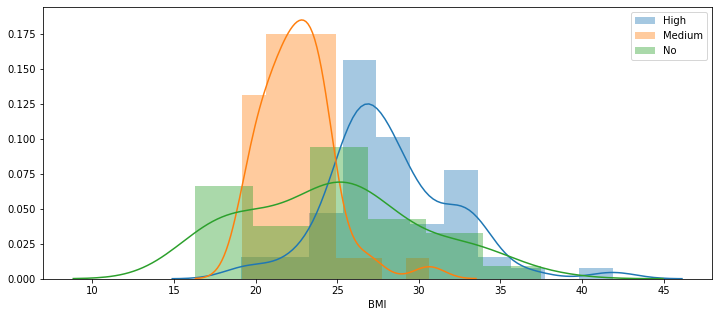

In [79]:
plt.figure(figsize=(12,5))
sns.distplot(df['BMI'][df.DiabeticRisk=='High Risk'])
sns.distplot(df['BMI'][df.DiabeticRisk=='Medium Risk'])
sns.distplot(df['BMI'][df.DiabeticRisk=='No Risk'])
plt.legend(['High','Medium','No'])
plt.show()

In [80]:
#cek banyaknya kolom dalam dataset
columns = df.columns.values.tolist()
print(columns)

['Gender', 'Age', 'SmokingHabit', 'MedConsumption', 'LeftHanded', 'BMI', 'Occupation', 'DiabeticRisk']


In [81]:
X = df[['Gender', 'Age', 'SmokingHabit', 'MedConsumption', 'LeftHanded', 'BMI', 'Occupation']]

In [82]:
y = df[['DiabeticRisk']]

In [83]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          170 non-null    object 
 1   Age             170 non-null    int64  
 2   SmokingHabit    170 non-null    object 
 3   MedConsumption  170 non-null    object 
 4   LeftHanded      170 non-null    object 
 5   BMI             170 non-null    float64
 6   Occupation      170 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 9.4+ KB


In [84]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DiabeticRisk  170 non-null    object
dtypes: object(1)
memory usage: 1.5+ KB


In [85]:
X_encoded = pd.get_dummies(X, columns=['Gender', 'SmokingHabit', 'MedConsumption', 'LeftHanded', 'Occupation'])
X_encoded.head()

,Age,BMI,Gender_Female,Gender_Male,SmokingHabit_No,SmokingHabit_Yes,MedConsumption_No,MedConsumption_Yes,LeftHanded_No,LeftHanded_Yes,Occupation_Housewife,Occupation_Not Working,Occupation_Working
0,69,27.01,0,1,0,1,1,0,1,0,0,1,0
1,70,24.78,1,0,1,0,0,1,1,0,1,0,0
2,75,20.63,1,0,1,0,1,0,1,0,1,0,0
3,59,26.30,1,0,1,0,1,0,1,0,1,0,0
4,60,27.78,1,0,1,0,0,1,1,0,1,0,0


In [86]:
df.Occupation.unique()

array(['Not Working', 'Housewife', 'Working'], dtype=object)

In [88]:
y.head()

,DiabeticRisk
0,No Risk
1,No Risk
2,No Risk
3,No Risk
4,No Risk


In [89]:
y_encoded = pd.get_dummies(y, columns=['DiabeticRisk'])
y_encoded.head()

,DiabeticRisk_High Risk,DiabeticRisk_Medium Risk,DiabeticRisk_No Risk
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [93]:
#split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [128]:
dtree = DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_leaf_nodes = 10, min_samples_leaf = 5, max_depth= 5)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

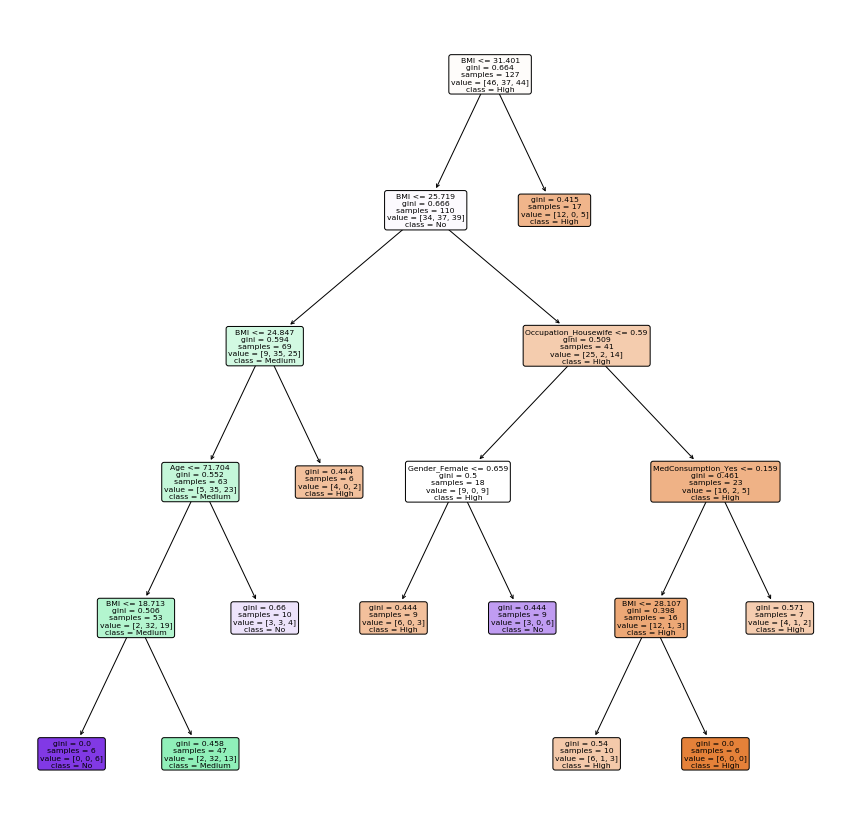

In [134]:
plt.figure(figsize=(15,15))
plot_tree(dtree,
         filled=True,
         rounded=True,
         class_names=['High','Medium','No'],
         feature_names=X_encoded.columns);

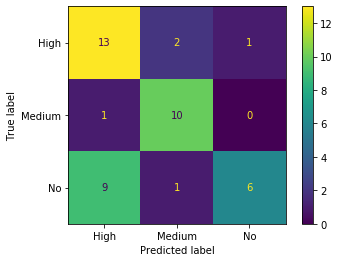

In [130]:
plot_confusion_matrix(dtree, X_test, y_test, display_labels=["High","Medium",'No'])

In [131]:
from sklearn.metrics import classification_report, accuracy_score
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))  
print(accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

   High Risk       0.57      0.81      0.67        16
 Medium Risk       0.77      0.91      0.83        11
     No Risk       0.86      0.38      0.52        16

    accuracy                           0.67        43
   macro avg       0.73      0.70      0.67        43
weighted avg       0.73      0.67      0.66        43

0.6744186046511628


In [132]:
#Accuracy is defined as: (fraction of correct predictions): correct predictions / total number of data points
score = dtree.score(X_test, y_test)
print(score)

0.6744186046511628


In [126]:
#UNTUK PRUNING GANTI2 RANGE MAXDEPTH AJA LALU COBA RUN ULANG DTREE CLASSIFIERnya
# List of values to try for max_depth:
max_depth_range = list(range(1, 11, 2))

In [127]:
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    dtree = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    dtree.fit(X_train, y_train)
    score = dtree.score(X_test, y_test)
    accuracy.append(score)

In [135]:
!pip install dtreeviz

  Created wheel for dtreeviz: filename=dtreeviz-1.1.2-py3-none-any.whl size=52361 sha256=94815ebb44461b78a2730746bccbc6ca7cdc3cc58cbd245cea07c59f1798bb1e
  Stored in directory: c:\users\shely muliawati\appdata\local\pip\cache\wheels\fd\48\9c\ba55c9d47180cd8948dccaa9189d1fe3f5ee4782199aa4c183
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612248 sha256=07e1698b613b7ff37eee048ef6efd5cb883ead42cabd7447d24fb3159f9ac4a4
  Stored in directory: c:\users\shely muliawati\appdata\local\pip\cache\wheels\5e\34\fa\b37b5cef503fc5148b478b2495043ba61b079120b7ff379f9b
Successfully built dtreeviz pyspark


In [179]:
import dtreeviz
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

AttributeError: 'DataFrame' object has no attribute 'dtype'